# Introduction

This project is an assignment component of the Data Scientist Nanodegree Program offered by Udacity. Within this project, I will employ the CRISP-DM methodology, a structured six-step approach, to analyze the QS World University Rankings spanning from 2017 to 2022.


Step 1: Business Understanding

I attempt to address four key questions that often intrigue students, researchers, and education enthusiasts when it comes to higher education. 

1. Which Country is Preferred by International Students?
2. What Makes a Best Ranked University?
3. What Are the Primary Contributors of High Research Output?
4. Are Public Universities Better Than Private?

Step 2: Data Understanding and Exploration


In [958]:
#importing libraries for EDA 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [959]:
#reading the dataset into pandas dataframe

uni_rankings = pd.read_csv("qs-world-university-rankings-2017-to-2022-V2.csv")


In [960]:
# Exploring the Variables 

display(uni_rankings.head())
print(uni_rankings.shape)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


(6482, 15)


In [961]:
# Calculating percentage of NA values within Dataframe

print(uni_rankings.isna().mean().sort_values(ascending=False).head(35))

score                     0.564949
city                      0.027461
international_students    0.025301
faculty_count             0.012033
student_faculty_ratio     0.011571
rank_display              0.010491
type                      0.001851
size                      0.000309
research_output           0.000309
logo                      0.000000
region                    0.000000
country                   0.000000
link                      0.000000
year                      0.000000
university                0.000000
dtype: float64


In [962]:
# How many entries are present per year?

entries_per_year = uni_rankings.groupby('year').apply(lambda x:x['country'].count())
entries_per_year

year
2017     933
2018     977
2019    1018
2020    1069
2021    1185
2022    1300
dtype: int64

In [963]:
# Calculating the percentage of missing values - year wise

missing_percentage_per_year = uni_rankings.groupby('year').apply(lambda x: (x.isna().sum() / len(x)) * 100)

In [964]:
missing_percentage_per_year

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
year,,,,,,,,,,,,,,,
2017,0.0,0.0,2.036442,56.698821,0.0,0.0,1.607717,0.0,0.0,0.000000,0.000000,1.393355,2.465166,0.000000,1.500536
2018,0.0,0.0,0.102354,58.751279,0.0,0.0,1.740020,0.0,0.0,0.204708,0.000000,1.330604,2.456499,0.000000,1.432958
2019,0.0,0.0,1.964637,50.392927,0.0,0.0,2.455796,0.0,0.0,0.196464,0.000000,1.375246,2.554028,0.000000,1.375246
2020,0.0,0.0,0.093545,53.133770,0.0,0.0,2.993452,0.0,0.0,0.374181,0.093545,1.496726,2.432180,0.093545,1.590271
2021,0.0,0.0,2.278481,57.299578,0.0,0.0,3.375527,0.0,0.0,0.337553,0.084388,1.434599,3.037975,0.084388,1.265823
2022,0.0,0.0,0.000000,61.461538,0.0,0.0,3.769231,0.0,0.0,0.000000,0.000000,0.153846,2.230769,0.000000,0.307692


In [965]:
#More than 56% of score values are missing, the dataset documentation aslo suggests that score is based on six other factors. 
#For our initital questions we can work without score. 

uni_rankings = uni_rankings.drop('score', axis=1)


In [966]:
# Link and logo columns can be dropped, as they do not have any weightage in the analysis

uni_rankings = uni_rankings.drop(columns=['link', 'logo'])
print(uni_rankings.shape)

(6482, 12)


In [967]:
# Check Dataframe information for int and string data types

print('### Dataframe information ###','\n')
uni_rankings.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 12 columns):
university                6482 non-null object
year                      6482 non-null int64
rank_display              6414 non-null object
country                   6482 non-null object
city                      6304 non-null object
region                    6482 non-null object
type                      6470 non-null object
research_output           6480 non-null object
student_faculty_ratio     6407 non-null float64
international_students    6318 non-null object
size                      6480 non-null object
faculty_count             6404 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 607.8+ KB


In [968]:
# We can drop NA from the dataframe as only a small percentage of NA rows are present as indicated by the percentages earlier. 

uni_rankings = uni_rankings.dropna()

In [969]:
# Get the number of unique universities across all years

unique_universities = uni_rankings['university'].nunique()
unique_universities

1261

In [970]:
# Group the DataFrame by year and calculate the count of unique universities per year

unique_universities_per_year = uni_rankings.groupby('year')['university'].nunique()

print(unique_universities_per_year.to_string())


year
2017     883
2018     929
2019     953
2020    1003
2021    1094
2022    1219


In [971]:
uni_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6081 entries, 0 to 6481
Data columns (total 12 columns):
university                6081 non-null object
year                      6081 non-null int64
rank_display              6081 non-null object
country                   6081 non-null object
city                      6081 non-null object
region                    6081 non-null object
type                      6081 non-null object
research_output           6081 non-null object
student_faculty_ratio     6081 non-null float64
international_students    6081 non-null object
size                      6081 non-null object
faculty_count             6081 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 617.6+ KB


In [972]:
# we can see that rank is a string/obj datatype further analyzing 

uni_rankings['rank_display'][400]

'401-410'

In [973]:
# Function to split, convert to float, and calculate the average rank

def split_and_average_rank(rank):
    
    # Split the rank values using '-'
    rank_parts = rank.split('-')
    
    # Convert each part to float
    rank_values = [float(part) for part in rank_parts]
    
    # Calculate the average rank
    average_rank = sum(rank_values) / len(rank_values)
    
    return average_rank

# Apply the function to the rank_display column
uni_rankings['avg_rank'] = uni_rankings['rank_display'].apply(split_and_average_rank)

# Print the DataFrame with the average rank
print(uni_rankings['avg_rank'].head())

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: avg_rank, dtype: float64


In [974]:
# function to check if value can not be converted to int
def isnot_int(val):
    try:
        int_val = int(val)
        return False
    except:
        return True

def isnot_float(val):
    try:
        int_val = float(val)
        return False
    except:
        return True

In [975]:
not_converted_values = uni_rankings[uni_rankings['international_students'].map(isnot_int)]
print(len(not_converted_values),"values cannot be converted to int.")
# Check result
# not_converted_values

4137 values cannot be converted to int.


In [976]:
# we can see that many values are string/obj datatype, further analyzing 

print(uni_rankings['international_students'][29])
print(uni_rankings['international_students'][378])

10,827
1.415


In [977]:
# Clean international_students to convert to numeric form 
uni_rankings['international_students'].replace(',','', regex=True, inplace=True)

In [978]:
not_converted_values = uni_rankings[uni_rankings['international_students'].map(isnot_int)]
print(len(not_converted_values),"values cannot be converted to int.")
# Check result
# not_converted_values

1970 values cannot be converted to int.


In [979]:
uni_rankings['international_students'].replace('\.','', regex=True, inplace=True)

In [980]:
# convert international_students to numeric form 
uni_rankings["international_students"] = pd.to_numeric(uni_rankings["international_students"])

In [981]:
# Verify 
uni_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6081 entries, 0 to 6481
Data columns (total 13 columns):
university                6081 non-null object
year                      6081 non-null int64
rank_display              6081 non-null object
country                   6081 non-null object
city                      6081 non-null object
region                    6081 non-null object
type                      6081 non-null object
research_output           6081 non-null object
student_faculty_ratio     6081 non-null float64
international_students    6081 non-null int64
size                      6081 non-null object
faculty_count             6081 non-null object
avg_rank                  6081 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.1+ KB


In [982]:
# Clean faculty_count to convert to numeric form 

not_converted_values = uni_rankings[uni_rankings['faculty_count'].map(isnot_int)]
print(len(not_converted_values),"values cannot be converted to int.")
# Check result
# not_converted_values

4345 values cannot be converted to int.


In [983]:
uni_rankings['faculty_count'].replace(',','', regex=True, inplace=True)

In [984]:
uni_rankings['faculty_count'].replace('\.','', regex=True, inplace=True)

In [985]:
# convert faculty_count to numeric form 

uni_rankings["faculty_count"] = pd.to_numeric(uni_rankings["faculty_count"])

In [986]:
#verify
uni_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6081 entries, 0 to 6481
Data columns (total 13 columns):
university                6081 non-null object
year                      6081 non-null int64
rank_display              6081 non-null object
country                   6081 non-null object
city                      6081 non-null object
region                    6081 non-null object
type                      6081 non-null object
research_output           6081 non-null object
student_faculty_ratio     6081 non-null float64
international_students    6081 non-null int64
size                      6081 non-null object
faculty_count             6081 non-null int64
avg_rank                  6081 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 825.1+ KB


In [987]:
#drop rank as we now have numeric avg rank column 
uni_rankings = uni_rankings.drop('rank_display', axis=1)
cat_df = uni_rankings.select_dtypes(include=['object'])

In [988]:
#view categorical colums
print(cat_df.columns)

Index(['university', 'country', 'city', 'region', 'type', 'research_output',
       'size'],
      dtype='object')


In [989]:
uni_rankings.shape

(6081, 12)

In [990]:
#check research_output data

uni_rankings['research_output'].value_counts()

Very High    4310
High         1330
Medium        370
Low            43
Very high      28
Name: research_output, dtype: int64

In [991]:
#convert to lower case to clean and process
uni_rankings['research_output'] = uni_rankings['research_output'].apply(lambda x:x.lower())

In [992]:
# Map the 'research_output' column to numerical values
research_output_mapping = {'low': 1, 'medium': 2, 'high': 3, 'very high': 4}
uni_rankings['research_output'] = uni_rankings['research_output'].map(research_output_mapping)

In [993]:
# Similarly for size column
uni_rankings['size'].value_counts()

L     2905
XL    1564
M     1316
S      296
Name: size, dtype: int64

In [994]:
# Map the 'size' column to numerical values
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4}
uni_rankings['size'] = uni_rankings['size'].map(size_mapping)

In [995]:
# Now for type column 
uni_rankings['type'].value_counts()

Public     4969
Private    1112
Name: type, dtype: int64

In [996]:
# we can use get dummies in this case 

df_type_cols = pd.get_dummies(uni_rankings['type'],prefix='Type', prefix_sep='_', dummy_na=False)

In [997]:
#concatenate the dfs

df = pd.concat([uni_rankings, df_type_cols], axis=1)

In [998]:
df.columns

Index(['university', 'year', 'country', 'city', 'region', 'type',
       'research_output', 'student_faculty_ratio', 'international_students',
       'size', 'faculty_count', 'avg_rank', 'Type_Private', 'Type_Public'],
      dtype='object')

In [999]:
df.head()

,university,year,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count,avg_rank,Type_Private,Type_Public
0,Massachusetts Institute of Technology (MIT),2017,United States,Cambridge,North America,Private,4,4.0,3730,2,3065,1.0,1,0
1,Stanford University,2017,United States,Stanford,North America,Private,4,3.0,3879,3,4725,2.0,1,0
2,Harvard University,2017,United States,Cambridge,North America,Private,4,5.0,5877,3,4646,3.0,1,0
3,University of Cambridge,2017,United Kingdom,Cambridge,Europe,Public,4,4.0,7925,3,5800,4.0,0,1
4,California Institute of Technology (Caltech),2017,United States,Pasadena,North America,Private,4,2.0,692,1,968,5.0,1,0


In [1000]:
df = df.drop('type', axis=1)

In [1001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6081 entries, 0 to 6481
Data columns (total 13 columns):
university                6081 non-null object
year                      6081 non-null int64
country                   6081 non-null object
city                      6081 non-null object
region                    6081 non-null object
research_output           6081 non-null int64
student_faculty_ratio     6081 non-null float64
international_students    6081 non-null int64
size                      6081 non-null int64
faculty_count             6081 non-null int64
avg_rank                  6081 non-null float64
Type_Private              6081 non-null uint8
Type_Public               6081 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 742.0+ KB


Step 3 - Data prep complete. Let us move on to answering the questions through modelling of data. 

Step 4 and 5 : Data modeling and result evaluation 

# Question 1: Which country is preferred by international students?

In [1002]:
df.shape

(6081, 13)

In [1003]:
# Group the DataFrame by 'Country' and sum the number of international students
country_preferences = df.groupby('country')['international_students'].sum()


In [1004]:
# Find the country with the highest total of international students
preferred_country = country_preferences.idxmax()
total_students = country_preferences.max()

# Print the result
print(f"The country preferred by international students is {preferred_country} with a total of {total_students} international students.")

The country preferred by international students is United States with a total of 2922814 international students.


In [1005]:
# Group the DataFrame by year and country and sum the number of international students
year_country_preferences = df.groupby(['year', 'country'])['international_students'].sum()

In [1006]:

#The preferred country for each year
preferred_countries_yearwise = year_country_preferences.groupby('year').idxmax()
preferred_countries_yearwise


year
2017    (2017, United States)
2018    (2018, United States)
2019    (2019, United States)
2020    (2020, United States)
2021    (2021, United States)
2022    (2022, United States)
Name: international_students, dtype: object

Top 5 Preferred Countries in 2017:
            country  international_students
486   United States                  476384
480  United Kingdom                  426752
6         Australia                  285599
70           Canada                  185999
156         Germany                  169597
Top 5 Preferred Countries in 2018:
            country  international_students
487   United States                  483384
481  United Kingdom                  450596
7         Australia                  291722
71           Canada                  185999
157         Germany                  173535
Top 5 Preferred Countries in 2019:
            country  international_students
488   United States                  483259
482  United Kingdom                  446931
8         Australia                  291722
72           Canada                  185999
158         Germany                  173535
Top 5 Preferred Countries in 2020:
            country  international_students
489   United States     

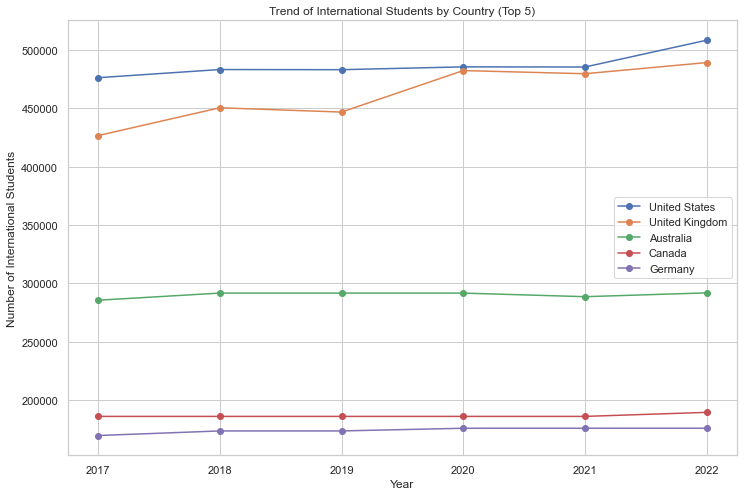

In [1007]:
int_students_df = df.groupby(['country', 'year'])['international_students'].sum().reset_index()

# Get unique years in the DataFrame
unique_years = int_students_df['year'].unique()
# Initialize a DataFrame to store the top 5 countries for each year
top_5_per_year = pd.DataFrame()

# Iterate through each unique year
for year in unique_years:
    year_data = int_students_df[int_students_df['year'] == year]
    
    # Find the top 5 preferred countries for the current year
    top_5_countries = year_data.nlargest(5, 'international_students')
    print(f"Top 5 Preferred Countries in {year}:")
    print(top_5_countries[['country', 'international_students']])
    
    # Append the top 5 countries for the current year to the DataFrame
    top_5_per_year = top_5_per_year.append(top_5_countries, ignore_index=True)

# Create a country-wise plot for the top countries across all years
plt.figure(figsize=(12, 8))
for country in top_5_per_year['country'].unique():
    country_data = top_5_per_year[top_5_per_year['country'] == country]
    
    # Plot the trend of year vs. no of international students for the current country
    plt.plot(country_data['year'], country_data['international_students'], marker='o', label=country)

plt.title('Trend of International Students by Country (Top 5)')
plt.xlabel('Year')
plt.ylabel('Number of International Students')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [1008]:
#dropping categorical column type before calculating correlation 
df_corr = df.drop(['Type_Public', 'Type_Private', 'year'], axis = 1)

In [1009]:
df_corr.columns

Index(['university', 'country', 'city', 'region', 'research_output',
       'student_faculty_ratio', 'international_students', 'size',
       'faculty_count', 'avg_rank'],
      dtype='object')

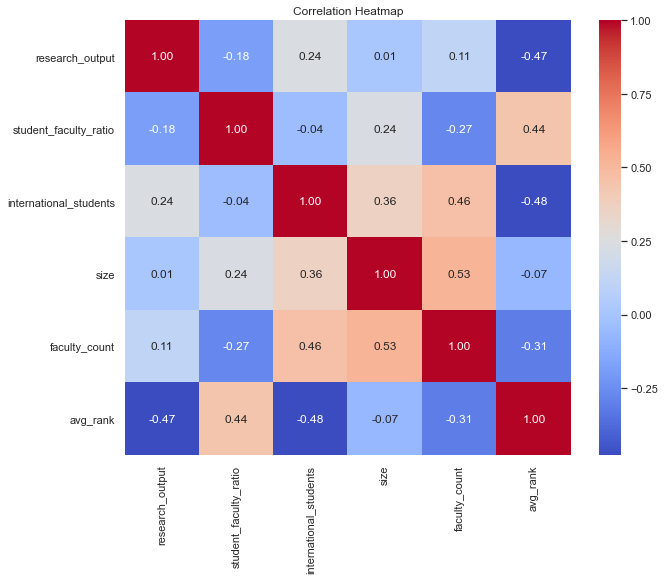

In [1010]:
# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Question 2. What makes a best ranked university?

In [ ]:
#checking this across all years


sns.set(style="whitegrid")

# Create subplots for different types of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# barplot for 'Number of international students' vs. 'Rank'
sns.scatterplot(data=df, y='international_students', x='avg_rank', ax=axes[0, 0])
axes[0, 0].set_ylabel('Number of International Students')
axes[0, 0].set_xlabel('University Rank')
axes[0, 0].set_title('scatterplot: Intl Students vs. Rank')

# lineplot for 'Research output' vs. 'Rank'
sns.lineplot(data=df, y='research_output', x='avg_rank', ax=axes[0, 1])
axes[0, 1].set_ylabel('Research Output')
axes[0, 1].set_xlabel('University Rank')
axes[0, 1].set_title('lineplot: Research Output vs. Rank')

# scatterplot for 'Size' vs. 'Rank'
sns.scatterplot(data=df, y='student_faculty_ratio', x='avg_rank', ax=axes[1, 0])
axes[1, 0].set_ylabel('Student:Faculty Ratio')
axes[1, 0].set_xlabel('University Rank')
axes[1, 0].set_title('scatterplot: Size vs. Rank')

# Box plot for 'Size' vs. 'Rank'
sns.scatterplot(data=df, x='faculty_count', y='avg_rank', ax=axes[1, 1])
axes[1, 1].set_ylabel('Faculty Count')
axes[1, 1].set_xlabel('University Rank')
axes[1, 1].set_title('scatterplot: Size vs. Rank')

plt.tight_layout()
plt.show()

In [ ]:
# Categorize universities into top-ranked and lower-ranked
top_ranked = df[df['avg_rank'] <= 100]
lower_ranked = df[df['avg_rank'] > 100]

# Calculate the average values of different factors
top_avg_values = top_ranked[['faculty_count', 'student_faculty_ratio', 'international_students']].mean()
# top_avg_values = top_ranked[['international_students']].mean()

lower_avg_values = lower_ranked[['faculty_count', 'student_faculty_ratio', 'international_students']].mean()
# lower_avg_values = lower_ranked[['international_students']].mean()



In [ ]:
print('Average Values for top ranked universities')
print('\n')
print(top_avg_values)

In [ ]:
top_ranked['research_output'].value_counts()

In [ ]:
print('Average Values for low ranked universities')
print('\n')
print(lower_avg_values)

In [ ]:
lower_ranked['research_output'].value_counts()

In [ ]:
#let's consider the top 25% as top-ranked and bottom 25% as lower-ranked
rank_cutoff = int(len(df) * 0.25)

# Sort the DataFrame by 'Rank' in ascending order
df.sort_values(by='avg_rank', inplace=True)


In [ ]:
# Split the DataFrame into top-ranked and lower-ranked universities
top_ranked = df[:rank_cutoff]
lower_ranked = df[-rank_cutoff:]

# List of factors to compare
factors_to_compare = ['research_output', 'faculty_count', 'international_students', 'student_faculty_ratio']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparison of Factors for Top-Ranked vs. Lower-Ranked Universities')

# Create individual bar plots for each factor and place them in subplots
for i, factor in enumerate(factors_to_compare):
    row = i // 2
    col = i % 2

    top_mean = top_ranked[factor].mean()
    lower_mean = lower_ranked[factor].mean()

    axs[row, col].bar(['Top-Ranked', 'Lower-Ranked'], [top_mean, lower_mean], color=['#87CEEB', '#FFA07A'])
    axs[row, col].set_xlabel('University Rank')
    axs[row, col].set_ylabel('Mean Value')
    axs[row, col].set_title(f'Comparison of {factor}')
    
# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Question 3. what are the primary contributors of high research output

In [ ]:
# fetching the correlation of reserach output
correlations = df[['international_students','faculty_count', 'size','student_faculty_ratio', 'avg_rank','research_output' ] ].corr()['research_output'].sort_values(ascending=False)
print(correlations)

In [ ]:
formatted_correlation_df = pd.DataFrame(correlations, columns=['research_output' ], index=['international_students','faculty_count', 'size','student_faculty_ratio', 'avg_rank','research_output' ]).applymap("{:.2f}".format)

In [ ]:
formatted_correlation_df

# Question 4. Are public universities better than private universities

In [ ]:
df.columns

In [ ]:
 sns.set(style="whitegrid")

# Create a box plot to compare research output between public and private universities
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Type_Private', y='research_output', hue='Type_Public')
plt.xlabel('University Type (0: Private, 1: Public)')
plt.ylabel('Research Output')
plt.title('Research Output Comparison: Public vs. Private Universities')
plt.legend(title='Type (Public/Private)', labels=['Public', 'Private'])

plt.show()

In [ ]:
# Set the rank range for high-ranked universities (e.g., ranks 1 to 50)
high_ranked_range = (1, 100)

# Count the number of public and private universities in the high-ranked range
public_high_ranked_count = len(df[(df['avg_rank'] >= high_ranked_range[0]) & (df['avg_rank'] <= high_ranked_range[1]) & (df['Type_Public'] == 1)])
private_high_ranked_count = len(df[(df['avg_rank'] >= high_ranked_range[0]) & (uni_rankings['avg_rank'] <= high_ranked_range[1]) & (df['Type_Private'] == 1)])

print(f'Number of Public High-Ranked Universities: {public_high_ranked_count}')
print(f'Number of Private High-Ranked Universities: {private_high_ranked_count}')

# Determine which type has more high-ranked universities
if public_high_ranked_count > private_high_ranked_count:
    print('Public universities have more high-ranked universities.')
elif private_high_ranked_count > public_high_ranked_count:
    print('Private universities have more high-ranked universities.')
else:
    print('There is an equal number of high-ranked public and private universities.')

In [ ]:
yearly_counts = df.groupby(['year', 'Type_Private']).apply(lambda x: len(x[(x['avg_rank'] >= high_ranked_range[0]) & (x['avg_rank'] <= high_ranked_range[1])])).reset_index(name='Count')

# Pivot the data to create separate columns for public and private counts
yearly_counts_pivot = yearly_counts.pivot(index='year', columns='Type_Private', values='Count').fillna(0)

# Rename the columns for clarity
yearly_counts_pivot.columns = ['Private', 'Public']

# Print the year-wise counts
print('Top 100 Universities and their types')
print(yearly_counts_pivot)

In [ ]:
df['Type_Private'].value_counts()

In [ ]:
# Calculate research output statistics for public universities
public_research_stats = df[df['Type_Public'] == 1][['research_output', 'international_students', 'faculty_count']].agg(['mean', 'median'])

# Calculate research output statistics for private universities
private_research_stats = df[df['Type_Private'] == 1][['research_output', 'international_students', 'faculty_count']].agg(['mean', 'median'])

# # Create a DataFrame to display the statistics
research_output_comparison = pd.concat([public_research_stats, private_research_stats], axis=1)
# research_output_comparison.rows = ['Public Mean', 'Public Median', 'Private Mean', 'Private Median']

# # Display the research output comparison table
print(research_output_comparison)

# (ADDITIONAL) 5. How can we predict score, what variables correlate well with score. 

In [ ]:
uni_rankings.head()

Q5 - Work in Progress ...

# Conclusion

1. Which Country is Preferred by International Students? - United States
2. What Makes a Best Ranked University? - High research output, High faculty count, more international students and lower ratio of student:faculty
3. What Are the Primary Contributors of High Research Output? - High faculty count, more international students and lower ratio of student:faculty
4. Are Public Universities Better Than Private? - Private Universities have stood out to be better in this dataset, based on their ranking. 

Please refer to https://medium.com/@haripriya.ramesh1996/a-data-driven-journey-into-the-worlds-top-universities-638ec49bc707 for description and analysis of findings.